## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
# Your code here - remember to use markdown cells for comments as well!

Here we are importing pandas package so I will be able to download data sets

In [10]:
tmbd_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz')

In the code above I used the aliased pandas package to read the data set

In [11]:
tmbd_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
tmbd_df.set_index('title', inplace = True)

In [14]:
tmbd_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [15]:
tmbd_df.drop(columns = ['original_title'], inplace = True)

In [16]:
tmbd_df['original_language'].value_counts(normalize = True)

en    0.878342
fr    0.019120
es    0.017159
ru    0.011238
ja    0.009994
        ...   
ps    0.000038
ky    0.000038
af    0.000038
dz    0.000038
mi    0.000038
Name: original_language, Length: 76, dtype: float64

In [17]:
tmbd_subset = tmbd_df.loc[(tmbd_df['vote_count'] > 5000) & (tmbd_df['vote_average'] > 7), ['popularity', 'release_date', 'vote_average']]

In [18]:
tmbd_subset

,popularity,release_date,vote_average
title,,,
Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7
How to Train Your Dragon,28.734,2010-03-26,7.7
Toy Story,28.005,1995-11-22,7.9
Inception,27.920,2010-07-16,8.3
Avatar,26.526,2009-12-18,7.4
...,...,...,...
2001: A Space Odyssey,23.781,1968-04-10,8.0
The Shape of Water,22.025,2017-12-01,7.2
The Greatest Showman,22.009,2017-12-20,8.0


In [19]:
tmbd_subset.sort_values(by= ['vote_average', 'popularity'], ascending = False).head(50)

,popularity,release_date,vote_average
title,,,
Spirited Away,32.043,2002-09-20,8.5
Spirited Away,32.043,2002-09-20,8.5
Schindler's List,25.334,1993-12-15,8.5
Whiplash,28.784,2014-10-10,8.4
Avengers: Infinity War,80.773,2018-04-27,8.3
Inception,27.920,2010-07-16,8.3
The Lion King,28.583,1994-06-23,8.2
Interstellar,28.440,2014-11-05,8.2
Coco,25.961,2017-11-22,8.2


In [20]:
tmbd_subset = tmbd_subset.reset_index()

In [21]:
tmbd_subset.drop_duplicates(subset = ['title'], inplace = True)

In [22]:
tmbd_subset.set_index('title', inplace = True)

In [23]:
tmbd_subset.sort_values(by= ['vote_average', 'popularity'], ascending = False).head(50)

,popularity,release_date,vote_average
title,,,
Spirited Away,32.043,2002-09-20,8.5
Schindler's List,25.334,1993-12-15,8.5
Whiplash,28.784,2014-10-10,8.4
Avengers: Infinity War,80.773,2018-04-27,8.3
Inception,27.920,2010-07-16,8.3
The Lion King,28.583,1994-06-23,8.2
Interstellar,28.440,2014-11-05,8.2
Coco,25.961,2017-11-22,8.2
"Three Billboards Outside Ebbing, Missouri",17.808,2017-11-10,8.2


In [24]:
tmbd_subset.shape

(120, 3)

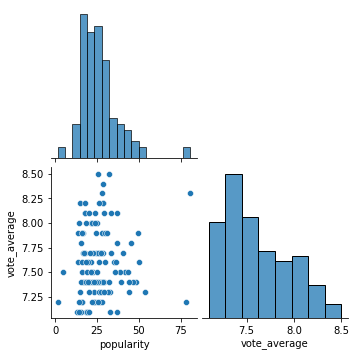

In [25]:
sns.pairplot(data = tmbd_subset, corner = True)

In [26]:
df_bom = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')

In [27]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [28]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [29]:
df_bom.set_index('title', inplace = True)

In [30]:
df_bom.dropna(subset = ['foreign_gross'], inplace = True)

In [31]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2033 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


In [32]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [33]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, Toy Story 3 to Antonio Lopez 1970: Sex Fashion & Disco
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          2033 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2037 non-null   float64
 3   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 79.6+ KB


In [34]:
df_bom['total_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']

In [35]:
df_bom

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05


In [36]:
tmbd_bom_df = tmbd_subset.join(df_bom)

In [37]:
tmbd_bom_df

,popularity,release_date,vote_average,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,NaN,NaN,NaN,NaN,NaN
How to Train Your Dragon,28.734,2010-03-26,7.7,P/DW,217600000.0,277300000.0,2010.0,494900000.0
Toy Story,28.005,1995-11-22,7.9,NaN,NaN,NaN,NaN,NaN
Inception,27.920,2010-07-16,8.3,WB,292600000.0,535700000.0,2010.0,828300000.0
Avatar,26.526,2009-12-18,7.4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
A Star Is Born,35.848,2018-10-05,7.5,NaN,NaN,NaN,NaN,NaN
Ready Player One,30.029,2018-03-29,7.6,WB,137700000.0,445200000.0,2018.0,582900000.0
A Quiet Place,29.154,2018-04-06,7.3,Par.,188000000.0,152900000.0,2018.0,340900000.0


In [38]:
rt_mov_info = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter = '\t')

In [39]:
rt_mov_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [40]:
rt_mov_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [41]:
rt_rev = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'latin-1' )

In [42]:
rt_rev

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [43]:
movie_budgets =  pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [44]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [45]:
con = sqlite3.connect('../zippedData/im.db/im.db')
cursor_obj = con.cursor()


In [47]:
%%bash
sqlite3 '../zippedData/im.db/im.db'
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [48]:
imdb_moviebasics = pd.read_sql  ("""
SELECT movie_id,
        primary_title as title,
        start_year as year,
        CAST(runtime_minutes as int) as runtime,
        genres
FROM movie_basics


""", con)

In [114]:
imdb_moviebasics = imdb_moviebasics.loc[(imdb_moviebasics['year'] > 2000)]

In [115]:
imdb_moviebasics

,movie_id,title,year,runtime,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146135,tt9916170,The Rehearsal,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama


In [116]:
imdb_moviebasics.dropna(subset = ['runtime'], inplace = True)

In [117]:
imdb_moviebasics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104419 entries, 0 to 146142
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie_id  104419 non-null  object 
 1   title     104419 non-null  object 
 2   year      104419 non-null  int64  
 3   runtime   104419 non-null  float64
 4   genres    102440 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ MB


In [118]:
imdb_d_mb = pd.read_sql  ("""
SELECT mb.movie_id,
        mb.primary_title as title,
        mb.start_year as year,
        mb.runtime_minutes as runtime,
        mb.genres,
        d.person_id as director,
        m.averagerating,
        m.numvotes
        
FROM movie_basics as mb
    INNER JOIN
    directors as d
    ON
    mb.movie_id = d.movie_id
    
    INNER JOIN
    movie_ratings as m
    ON
    mb.movie_id = m.movie_id

""", con)

In [119]:
imdb_d_mb

,movie_id,title,year,runtime,genres,director,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",nm0002411,7.2,43
...,...,...,...,...,...,...,...,...
181384,tt9914642,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181385,tt9914642,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181386,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5
181387,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5


In [120]:
imdb_maka = pd.read_sql  ("""
SELECT *

FROM movie_ratings


""", con)

In [121]:
imdb_maka

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [122]:
imdb_maka_d_mb = imdb_d_mb(imdb_maka, on = 'movie_id')

TypeError: 'DataFrame' object is not callable

In [123]:
imdb_combined.info()

NameError: name 'imdb_combined' is not defined

In [124]:
imdb_princ = pd.read_sql  ("""
SELECT *
FROM principals

""", con)

In [125]:
imdb_princ

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [126]:
imdb_pers = pd.read_sql  ("""
SELECT *
FROM persons

""", con)

In [127]:
imdb_pers

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [128]:
imdb_d_mb_princ = pd.read_sql  ("""
SELECT mb.movie_id,
        mb.primary_title as title,
        mb.start_year as year,
        mb.runtime_minutes as runtime,
        mb.genres,
        d.person_id as director,
        m.averagerating as "average rating",
        m.numvotes as "number of votes",
        p.person_id,
        p.category
        
        
FROM movie_basics as mb
    INNER JOIN
    directors as d
    ON
    mb.movie_id = d.movie_id
    
    INNER JOIN
    movie_ratings as m
    ON
    mb.movie_id = m.movie_id
    
    INNER JOIN
    principals as p
    ON
    mb.movie_id = p.movie_id

""", con)

In [129]:
imdb_data = imdb_d_mb_princ.merge(imdb_pers, how = 'inner', on = 'person_id')

In [130]:
imdb_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad,1919.0,2006.0,"composer,soundtrack,music_department"
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi,1927.0,2009.0,"writer,actor,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658069,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar,NaN,NaN,actor
1658070,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar,NaN,NaN,actor
1658071,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm5684093,director,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer"
1658072,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm6460816,self,Nils Leidal,NaN,NaN,None


In [131]:
imdb_data.drop(columns = ['birth_year', 'death_year', 'primary_profession'], inplace = True)

In [132]:
imdb_data.drop_duplicates(subset = ['movie_id', 'title','person_id','year','runtime', 'genres', 'director'], inplace = True)

In [133]:
imdb_data.head(50)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi
8,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0347899,writer,Gulzar
12,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,6.1,13,nm0347899,writer,Gulzar
13,tt0357717,Haar Jeet,2018,NaN,Drama,nm1065099,5.1,9,nm0347899,writer,Gulzar
15,tt1946280,Noukadubi,2011,135.0,"Drama,Romance",nm0315916,7.6,626,nm0347899,writer,Gulzar
18,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm0704694,7.5,1741,nm0347899,writer,Gulzar
23,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm2264108,7.5,1741,nm0347899,writer,Gulzar
28,tt4940456,Mirzya,2016,129.0,"Drama,Musical,Romance",nm1018493,4.7,1548,nm0347899,writer,Gulzar
29,tt5764024,OK Jaanu,2017,135.0,"Drama,Romance",nm1249945,5.2,3240,nm0347899,writer,Gulzar


In [134]:
imdb_data = imdb_data.loc[(imdb_data['category'] == 'actress') | (imdb_data['category'] == 'director') | (imdb_data['category'] == 'actor')]

In [135]:
imdb_data['category'].value_counts()

actor       177218
director    121239
actress     105157
Name: category, dtype: int64

In [136]:
imdb_data = imdb_data.loc[imdb_data['number of votes'] > 10000]

In [137]:
imdb_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
90,tt1767372,She's Funny That Way,2014,93.0,"Comedy,Drama",nm0000953,6.1,22179,nm0000953,director,Peter Bogdanovich
252,tt5639354,A Fantastic Woman,2017,104.0,Drama,nm0133326,7.2,18282,nm0721280,actor,Francisco Reyes
882,tt2844798,White God,2014,121.0,"Drama,Fantasy,Horror",nm0610960,6.9,13755,nm0610960,director,Kornél Mundruczó
892,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski
1048,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston
...,...,...,...,...,...,...,...,...,...,...,...
1631836,tt8361028,Cam,2018,94.0,"Horror,Mystery,Thriller",nm3771823,6.0,17482,nm3771823,director,Daniel Goldhaber
1644137,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm0737517,director,Mike Rohl
1644139,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm10238213,actor,Alexa Adeosun
1644141,tt8954732,The Princess Switch,2018,101.0,Romance,nm0737517,6.0,13993,nm2964642,actor,Nick Sagar


In [138]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [139]:
Imdb_newdata = imdb_data.merge(movie_budgets, how = "inner", left_on = 'title', right_on = 'movie')

In [140]:
Imdb_newdata

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2197025,director,Deniz Gamze Ergüven,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7786,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2379003,actress,Elit Iscan,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7787,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322143,actress,Günes Sensoy,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7788,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322144,actress,Doga Zeynep Doguslu,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"


In [141]:
Imdb_newdata['movie_id'].nunique()

1332

In [142]:
Imdb_newdata.drop(columns = 'id', inplace = True)

In [240]:
Imdb_newdata.head(50)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
6,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0428065,actress,Felicity Jones,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
7,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm2309517,actor,Armie Hammer,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
8,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0857620,actor,Justin Theroux,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
9,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001460,director,Mimi Leder,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377


In [144]:
Imdb_newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7790 entries, 0 to 7789
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7790 non-null   object 
 1   title              7790 non-null   object 
 2   year               7790 non-null   int64  
 3   runtime            7790 non-null   float64
 4   genres             7790 non-null   object 
 5   director           7790 non-null   object 
 6   average rating     7790 non-null   float64
 7   number of votes    7790 non-null   int64  
 8   person_id          7790 non-null   object 
 9   category           7790 non-null   object 
 10  primary_name       7790 non-null   object 
 11  release_date       7790 non-null   object 
 12  movie              7790 non-null   object 
 13  production_budget  7790 non-null   object 
 14  domestic_gross     7790 non-null   object 
 15  worldwide_gross    7790 non-null   object 
dtypes: float64(2), int64(2),

In [145]:
Imdb_newdata['production_budget'] = Imdb_newdata['production_budget'].apply(lambda x: x.strip('$'))

In [146]:
Imdb_newdata['domestic_gross'] = Imdb_newdata['domestic_gross'].apply(lambda x: x.strip('$'))

In [147]:
Imdb_newdata['worldwide_gross'] = Imdb_newdata['worldwide_gross'].apply(lambda x: x.strip('$'))

In [148]:
Imdb_newdata['production_budget'] = Imdb_newdata['production_budget'].apply(lambda x: int(x.replace(',','')))

In [149]:
Imdb_newdata['domestic_gross'] = Imdb_newdata['domestic_gross'].apply(lambda x: int(x.replace(',','')))

In [150]:
Imdb_newdata['worldwide_gross'] = Imdb_newdata['worldwide_gross'].apply(lambda x: int(x.replace(',','')))

In [238]:
Imdb_newdata.head(60)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,"Jul 23, 2010",Salt,130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
6,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0428065,actress,Felicity Jones,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
7,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm2309517,actor,Armie Hammer,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
8,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0857620,actor,Justin Theroux,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377
9,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",nm0001460,6.9,12083,nm0001460,director,Mimi Leder,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,18073377


In [152]:
Imdb_newdata['profit'] = Imdb_newdata['worldwide_gross'] - Imdb_newdata['production_budget']

In [153]:
Imdb_newdata['year'].min()

2010

In [154]:
Imdb_newdata['genres'].value_counts()

Adventure,Animation,Comedy    570
Comedy                        355
Action,Adventure,Sci-Fi       310
Comedy,Drama,Romance          277
Comedy,Drama                  244
                             ... 
Action                          4
Comedy,Drama,History            4
Documentary                     3
Music                           2
Action,Comedy,Documentary       1
Name: genres, Length: 207, dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='profit'>

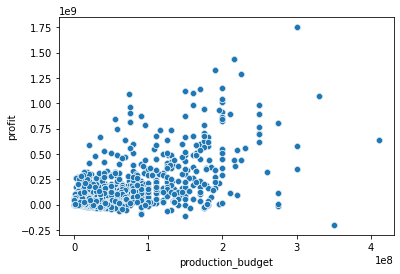

In [92]:
sns.scatterplot(data = Imdb_newdata, x = 'production_budget', y = 'profit')

<AxesSubplot:xlabel='average rating', ylabel='profit'>

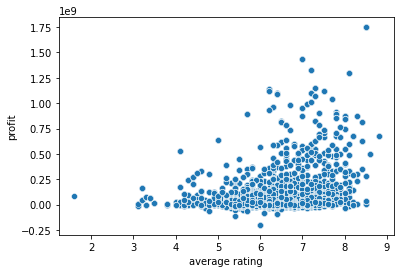

In [98]:
sns.scatterplot(data = Imdb_newdata, x = 'average rating', y = 'profit')

In [112]:
Imdb_newdata.drop(columns = 'movie', inplace = True)

In [155]:
Imdb_newest_data = Imdb_newdata.drop_duplicates(subset = ['movie_id'])


In [158]:
Imdb_newest_data['genres'].()

array(['Action,Mystery,Thriller', 'Biography,Drama', 'Comedy,Romance',
       'Biography,Crime,Drama', 'Comedy,Crime', 'Action,Adventure,Comedy',
       'Comedy,Drama', 'Action,Adventure,Sci-Fi', 'Action,Drama,Mystery',
       'Adventure,Animation,Comedy', 'Crime,Drama,Mystery',
       'Action,Adventure,Fantasy', 'Documentary', 'Drama,Sci-Fi,Thriller',
       'Adventure,Comedy,Family', 'Adventure,Comedy,Crime',
       'Action,Crime,Thriller', 'Action,Crime,Drama', 'Action,Thriller',
       'Action,Drama,Thriller', 'Action,Adventure,Animation',
       'Action,Comedy,Romance', 'Action,Drama,History',
       'Adventure,Comedy,Drama', 'Biography,Drama,Sport',
       'Action,Drama,Fantasy', 'Action,Crime,Horror',
       'Biography,Drama,Thriller', 'Drama,Horror,Mystery',
       'Comedy,Drama,Romance', 'Drama,Thriller', 'Crime,Drama,Thriller',
       'Drama,Music', 'Drama,Sport', 'Comedy,Fantasy,Romance',
       'Sci-Fi,Thriller', 'Adventure,Drama,Romance', 'Drama',
       'Drama,Romance,Sci

In [164]:
Imdb_newest_data = Imdb_newest_data.explode('genres')

In [216]:
Imdb_newest_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [251]:
Imdb_newest_data['genres'].value_counts()

Drama          672
Comedy         461
Action         419
Adventure      341
Thriller       249
Crime          230
Romance        182
Horror         168
Sci-Fi         140
Biography      131
Mystery        128
Fantasy        119
Animation       92
Family          70
History         40
Music           36
Sport           26
War             13
Western         10
Documentary      9
Musical          5
Name: genres, dtype: int64

In [196]:
Imdb_newest_data.loc[Imdb_newest_data['genres'] == 'Drama'].sort_values(by = ['profit','average rating'], ascending = False)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
5896,tt1323045,Frozen,2010,93.0,Drama,nm1697112,6.2,62311,nm0954225,actor,Kevin Zegers,"Nov 22, 2013",150000000,400738009,1272469910,1122469910
804,tt2316801,Beauty and the Beast,2014,112.0,Drama,nm0304521,6.4,18100,nm0001993,actor,Vincent Cassel,"Mar 17, 2017",160000000,504014165,1259199706,1099199706
7338,tt1727824,Bohemian Rhapsody,2018,134.0,Drama,nm0001741,8.0,345466,nm0001741,director,Bryan Singer,"Nov 2, 2018",55000000,216303339,894985342,839985342
1707,tt3040964,The Jungle Book,2016,106.0,Drama,nm0269463,7.4,240821,nm0269463,director,Jon Favreau,"Apr 15, 2016",175000000,364001123,962854547,787854547
375,tt1325004,The Twilight Saga: Eclipse,2010,124.0,Drama,nm1720541,5.0,211733,nm0829576,actress,Kristen Stewart,"Jun 30, 2010",68000000,300531751,706102828,638102828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,tt1972591,King Arthur: Legend of the Sword,2017,126.0,Drama,nm0005363,6.8,169054,nm0402271,actor,Charlie Hunnam,"May 12, 2017",175000000,39175066,139630336,-35369664
3153,tt1075747,Jonah Hex,2010,81.0,Drama,nm0371755,4.7,51860,nm0000982,actor,Josh Brolin,"Jun 18, 2010",47000000,10547117,11022696,-35977304
6535,tt1014763,Child 44,2015,137.0,Drama,nm1174251,6.5,59477,nm0000198,actor,Gary Oldman,"Apr 17, 2015",50000000,1224330,8004221,-41995779
5578,tt2361317,Live by Night,2016,129.0,Drama,nm0000255,6.4,47243,nm0000255,actor,Ben Affleck,"Dec 25, 2016",65000000,10378555,21774432,-43225568


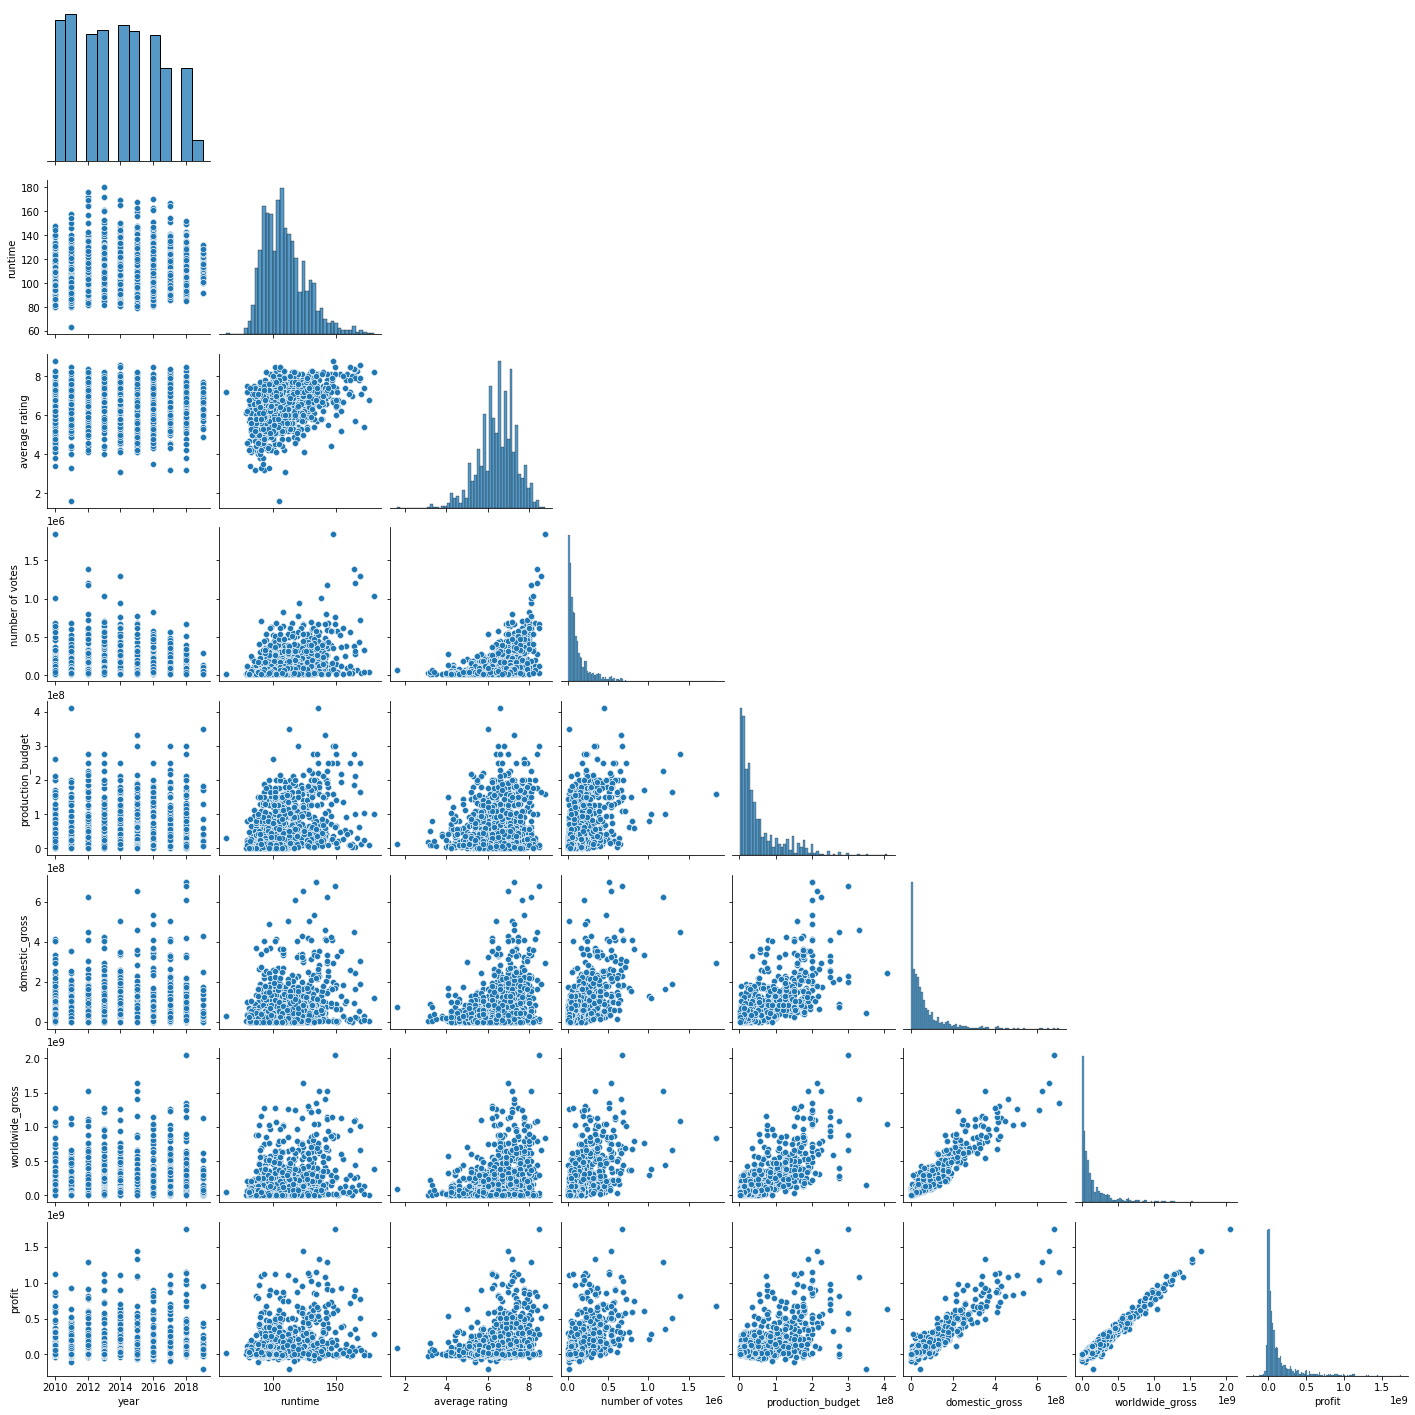

In [187]:
sns.pairplot(Imdb_newest_data, corner = True)

In [175]:
Imdb_newest_data.drop(columns = 'genre', inplace = True)

In [180]:
Imdb_newest_data.drop(columns = 'movie', inplace = True)

In [262]:
Imdb_newest_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,nm0001460,6.9,12083,nm0001832,actor,Sam Waterston,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,nm2618764,5.1,41741,nm4725341,actor,Joivan Wade,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,nm0601619,6.7,11628,nm0601619,director,Michael Moore,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [236]:
genre_scatter_df = Imdb_newest_data[Imdb_newest_data['genres'].isin(['Comedy'])]

<AxesSubplot:xlabel='average rating', ylabel='profit'>

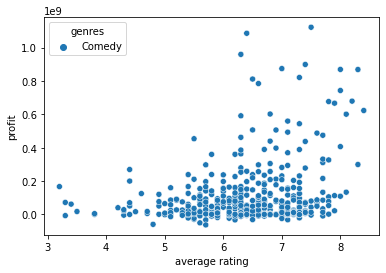

In [241]:
sns.scatterplot(data = genre_scatter_df, x = 'average rating', y ='profit', hue = 'genres')

In [254]:
genre_bar_df = Imdb_newest_data[Imdb_newest_data['genres'].isin(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Fantasy', 'Animation'])]

In [260]:
genre_bar_df.loc[(genre_bar_df['genres'] == 'Animation')].describe()

,year,runtime,average rating,number of votes,production_budget,domestic_gross,worldwide_gross,profit
count,92.000000,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01
mean,2013.967391,95.989130,6.781522,138434.793478,1.051087e+08,1.497192e+08,4.168477e+08,3.117390e+08
std,2.561126,7.876093,0.911457,141702.237002,5.256894e+07,1.127274e+08,3.040565e+08,2.772972e+08
min,2010.000000,63.000000,3.200000,11728.000000,8.000000e+06,4.909730e+05,6.485990e+05,-1.104502e+08
25%,2012.000000,91.000000,6.300000,42213.750000,6.800000e+07,6.932622e+07,1.770042e+08,1.140242e+08
50%,2014.000000,95.500000,6.800000,83420.500000,9.700000e+07,1.308584e+08,3.488180e+08,2.377804e+08
75%,2016.000000,102.000000,7.300000,196045.250000,1.450000e+08,1.899222e+08,5.610539e+08,4.419886e+08
max,2019.000000,118.000000,8.400000,682218.000000,2.600000e+08,6.085817e+08,1.272470e+09,1.122470e+09


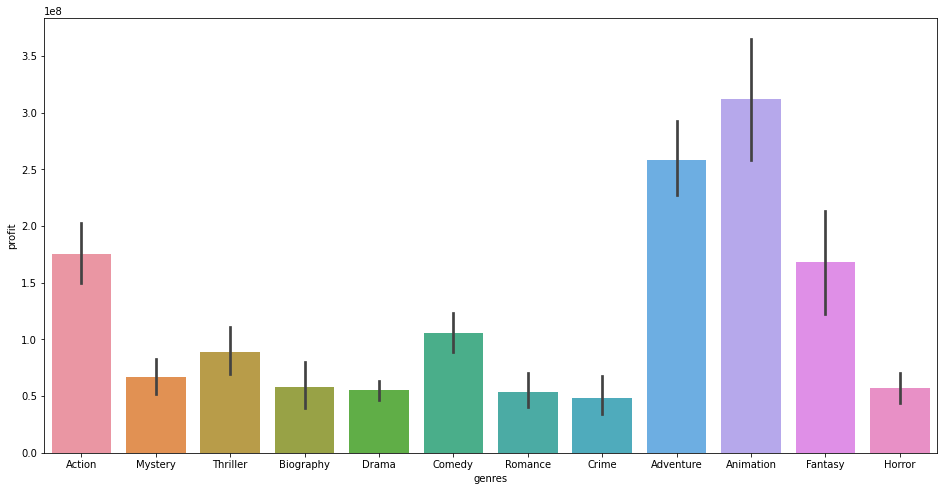

In [259]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = genre_bar_df, x = 'genres', y = 'profit');

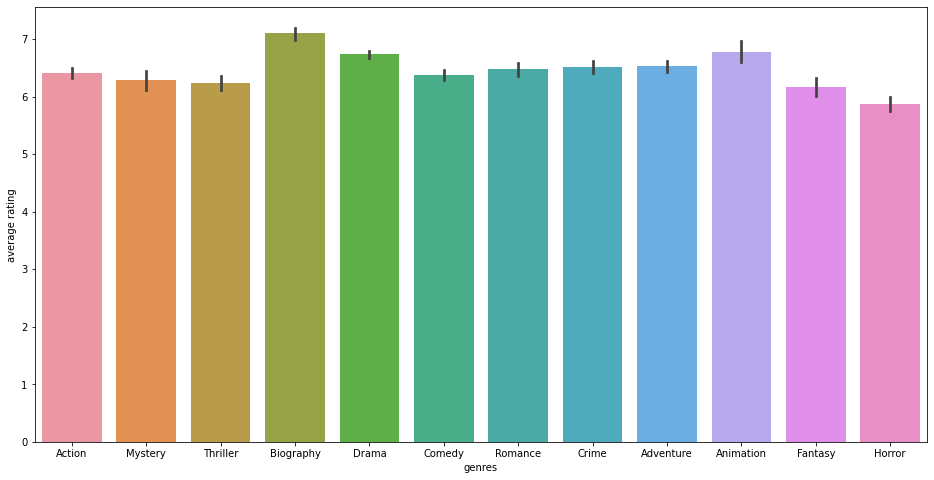

In [263]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = genre_bar_df, x = 'genres', y = '');